In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imblearn as imb
from collections import Counter
from numpy import where
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [6]:
!wget -O dataset_activity.csv https://raw.githubusercontent.com/Handit14/OrbitFutureAcademy_KampusMerdeka/main/Materi/dataset_activity.csv

--2021-11-12 14:37:53--  https://raw.githubusercontent.com/Handit14/OrbitFutureAcademy_KampusMerdeka/main/Materi/dataset_activity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34061 (33K) [text/plain]
Saving to: ‘dataset_activity.csv’

dataset_activity.cs 100%[===================>]  33.26K  --.-KB/s    in 0s      

2021-11-12 14:37:53 (113 MB/s) - ‘dataset_activity.csv’ saved [34061/34061]



In [7]:
data = pd.read_csv('dataset_activity.csv')

In [8]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [9]:
data.columns

Index(['PH', 'cahaya', 'intensitas air', 'suhu', 'PPM', 'tinggi air', 'aksi'], dtype='object')

In [10]:
column = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air',
       'aksi']

data.columns = column

In [11]:
data.columns

Index(['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [12]:
def category_to_num_cahaya(category):
    if category=='Ada':
        return 1
    elif category=='Tidak ada':
        return 0
    else:
        return category

data["cahaya"]=data["cahaya"].apply(category_to_num_cahaya)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,1.0,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,1.0,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,1.0,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,1.0,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [13]:
def category_to_num_intensitas(category):
    if category=='Rendah sekali':
        return 0.0
    elif category=='Rendah':
        return 1.0
    elif category=='Cukup':
        return 2.0
    elif category=='Tinggi':
        return 3.0
    else:
        return category

data["intensitas_air"]=data["intensitas_air"].apply(category_to_num_intensitas)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3.0,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,3.0,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,3.0,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,3.0,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,3.0,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,1.0,0.0,25.3,904.0,47,Hidupkan Lampu
612,2.1,1.0,0.0,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,1.0,0.0,25.3,793.0,19,Hidupkan Lampu
614,1.4,1.0,0.0,25.4,1052.0,3,Hidupkan Lampu


In [14]:
def category_to_num_aksi(category):
    if category=='Tidak melakukan apa-apa':
        return 0.0
    elif category=='Hidupkan Lampu':
        return 1.0
    elif category=='Hidupkan Pompa nutrisi TDS':
        return 2.0
    elif category=='Hidupkan Lampu dan Pompa nutrisi TDS':
        return 3.0
    else:
        return category

data["aksi"]=data["aksi"].apply(category_to_num_aksi)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3.0,27.0,188.0,622,3.0
1,5.7,1.0,3.0,26.9,79.0,557,3.0
2,6.0,1.0,3.0,27.0,11.0,491,3.0
3,6.5,1.0,3.0,27.1,345.0,12000,0.0
4,6.2,NaN,3.0,27.1,602.0,444,0.0
...,...,...,...,...,...,...,...
611,4.6,1.0,0.0,25.3,904.0,47,1.0
612,2.1,1.0,0.0,25.0,388.0,18,3.0
613,3.2,1.0,0.0,25.3,793.0,19,1.0
614,1.4,1.0,0.0,25.4,1052.0,3,1.0


## 3. Handle Missing Value

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              600 non-null    float64
 1   cahaya          590 non-null    float64
 2   intensitas_air  616 non-null    float64
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi_air      616 non-null    int64  
 6   aksi            616 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 33.8 KB


In [16]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


In [17]:
#Handle Missing data kolomm non categorical
columns_missing = ['PH', 'suhu', 'PPM']

for col in columns_missing:
    data[col].replace(np.nan, data[col].mean(), inplace=True)
    
data.isnull().sum()

PH                 0
cahaya            26
intensitas_air     0
suhu               0
PPM                0
tinggi_air         0
aksi               0
dtype: int64

In [18]:
data['cahaya'].mode()

0    1.0
dtype: float64

In [19]:
#Handle Missing data kolomm categorical menggunakan modus
columns_missing = ['cahaya']

for col in columns_missing:
    data[col].replace(np.nan, 1.0, inplace=True)
    
data.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

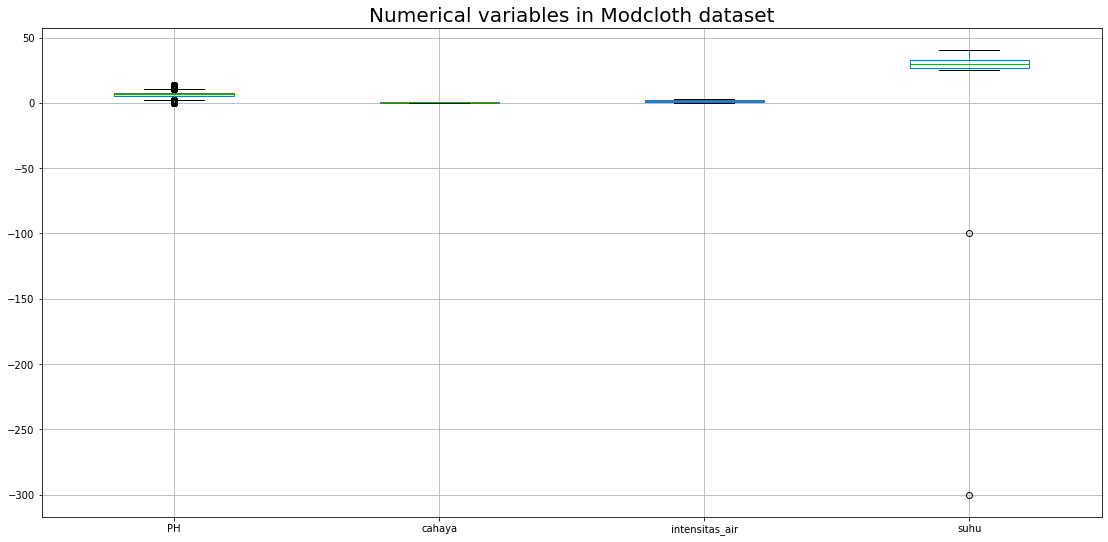

In [20]:
num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

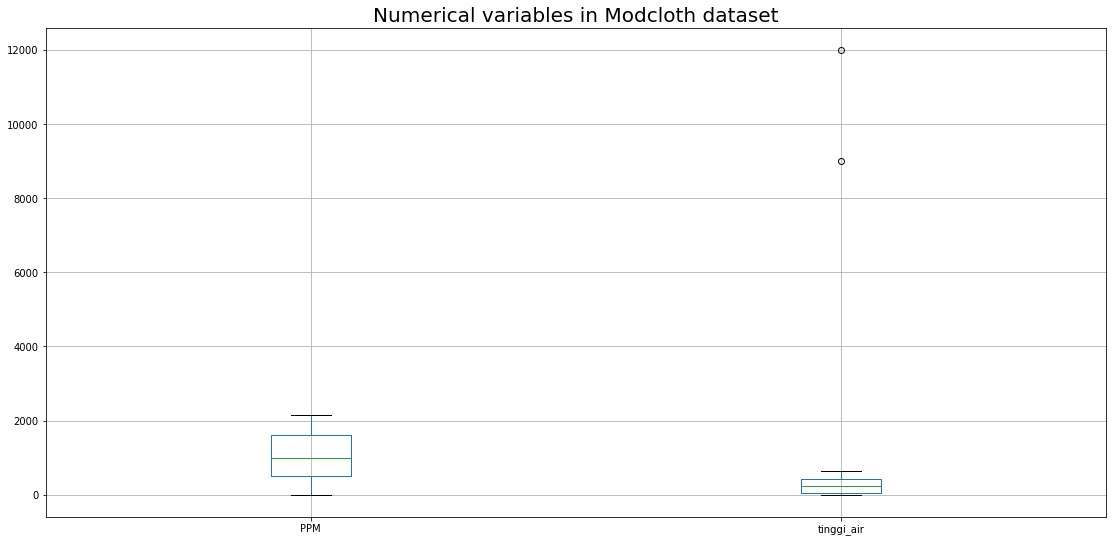

In [21]:
num_cols = ['PPM', 'tinggi_air']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [22]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

columns_outlier = ['tinggi_air', 'suhu']
for col in columns_outlier:
    outliers=[]
    outlier_datapoints = detect_outlier(data[col])
    print(col, outlier_datapoints)

tinggi_air [12000, 9000]
suhu [-300.0, -100.0]


In [23]:
data.drop(data.loc[(data.tinggi_air == 12000) | (data.tinggi_air==9000)].index, inplace=True)

In [24]:
data.drop(data.loc[(data.suhu == -300) | (data.suhu==-100)].index, inplace=True)

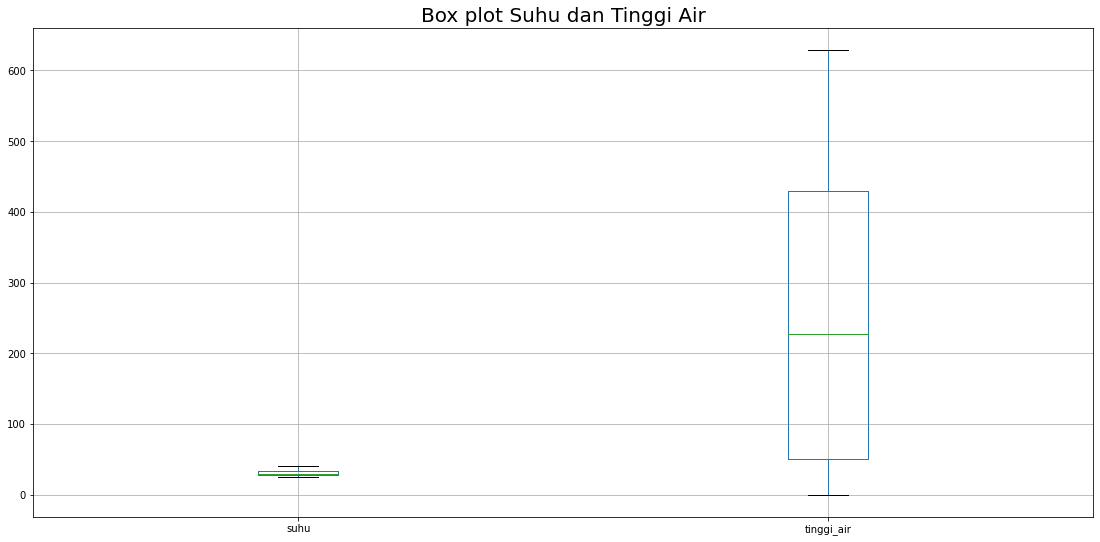

In [25]:
num_cols = ['suhu', 'tinggi_air']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Box plot Suhu dan Tinggi Air", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [26]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-5
X = data.iloc[:,:6].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-6
Y = data.iloc[:,6].values

In [27]:
print(X, Y)

[[6.500e+00 1.000e+00 3.000e+00 2.700e+01 1.880e+02 6.220e+02]
 [5.700e+00 1.000e+00 3.000e+00 2.690e+01 7.900e+01 5.570e+02]
 [6.000e+00 1.000e+00 3.000e+00 2.700e+01 1.100e+01 4.910e+02]
 ...
 [3.200e+00 1.000e+00 0.000e+00 2.530e+01 7.930e+02 1.900e+01]
 [1.400e+00 1.000e+00 0.000e+00 2.540e+01 1.052e+03 3.000e+00]
 [5.000e+00 1.000e+00 0.000e+00 2.530e+01 9.770e+02 1.900e+01]] [3. 3. 3. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 3. 3. 3. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [28]:
#pip install imbalanced-learn

In [29]:
data.aksi.value_counts()

0.0    469
1.0     92
3.0     39
2.0     12
Name: aksi, dtype: int64

In [30]:
counter = Counter(Y)
print(counter)

Counter({0.0: 469, 1.0: 92, 3.0: 39, 2.0: 12})


In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
counter = Counter(Y_smote)
print(counter)

Counter({3.0: 469, 0.0: 469, 1.0: 469, 2.0: 469})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi




In [33]:
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3.0,27.0,188.0,622,3.0
1,5.7,1.0,3.0,26.9,79.0,557,3.0
2,6.0,1.0,3.0,27.0,11.0,491,3.0
4,6.2,1.0,3.0,27.1,602.0,444,0.0
5,6.1,1.0,3.0,27.0,561.0,405,1.0
...,...,...,...,...,...,...,...
611,4.6,1.0,0.0,25.3,904.0,47,1.0
612,2.1,1.0,0.0,25.0,388.0,18,3.0
613,3.2,1.0,0.0,25.3,793.0,19,1.0
614,1.4,1.0,0.0,25.4,1052.0,3,1.0


In [34]:
data['cahaya'].value_counts()

1.0    327
0.0    285
Name: cahaya, dtype: int64

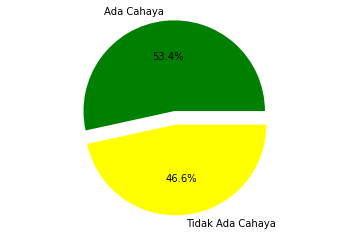

In [35]:
import matplotlib.pyplot as plt
from matplotlib import style

ada_cahaya = (data['cahaya'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
tidak_ada_cahaya = (data['cahaya'] == 0).sum() 
# print(males)
# print(females)
p = [ada_cahaya, tidak_ada_cahaya]
plt.pie(p,    #giving array
        autopct='%1.1f%%',
       labels = ['Ada Cahaya', 'Tidak Ada Cahaya'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

In [36]:
cahaya_0 =data[data['cahaya'] == 1][data['aksi'] == 0].shape[0]
cahaya_1 =data[data['cahaya'] == 1][data['aksi'] == 1].shape[0]
cahaya_2 =data[data['cahaya'] == 1][data['aksi'] == 2].shape[0]
cahaya_3 =data[data['cahaya'] == 1][data['aksi'] == 3].shape[0]

no_cahaya_0 =data[data['cahaya'] == 0][data['aksi'] == 0].shape[0]
no_cahaya_1 =data[data['cahaya'] == 0][data['aksi'] == 1].shape[0]
no_cahaya_2 =data[data['cahaya'] == 0][data['aksi'] == 2].shape[0]
no_cahaya_3 =data[data['cahaya'] == 0][data['aksi'] == 3].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match

Text(0.5, 1.0, 'Jumlah Tiap Aksi dilihat dari Ada atau Tidaknya Cahaya')

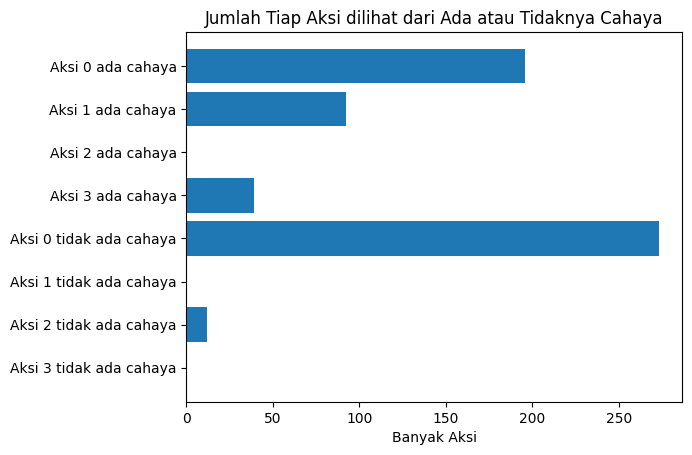

In [37]:
chart=[cahaya_0, cahaya_1, cahaya_2, cahaya_3, no_cahaya_0, no_cahaya_1, no_cahaya_2, no_cahaya_3]
colors=['lightskyblue','yellowgreen','Yellow','Orange', 'Pink', 'Red', 'Blue', 'Green']
labels=["Aksi 0 ada cahaya","Aksi 1 ada cahaya","Aksi 2 ada cahaya","Aksi 3 ada cahaya", 'Aksi 0 tidak ada cahaya', 'Aksi 1 tidak ada cahaya'
        , 'Aksi 2 tidak ada cahaya', 'Aksi 3 tidak ada cahaya']

y_pos = np.arange(len(labels))

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, chart, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Banyak Aksi')
ax.set_title('Jumlah Tiap Aksi dilihat dari Ada atau Tidaknya Cahaya')

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [38]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(X)
# print(scaled)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
# transform data
scaled_smote = scaler.fit_transform(X_smote)
print(scaled_smote)

[[0.46428571 1.         1.         0.12820513 0.08705773 0.98887122]
 [0.40714286 1.         1.         0.12179487 0.03631285 0.88553259]
 [0.42857143 1.         1.         0.12820513 0.00465549 0.78060413]
 ...
 [0.90680463 1.         0.66666667 0.09615385 0.18696352 0.54773707]
 [0.58981954 1.         0.64966115 0.11281182 0.02620065 0.875507  ]
 [0.82289594 1.         0.66666667 0.09615385 0.19182478 0.53632395]]


In [40]:
scaler =  MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[0.46428571 1.         1.         0.12820513 0.08705773 0.98887122]
 [0.40714286 1.         1.         0.12179487 0.03631285 0.88553259]
 [0.42857143 1.         1.         0.12820513 0.00465549 0.78060413]
 ...
 [0.22857143 1.         0.         0.01923077 0.36871508 0.03020668]
 [0.1        1.         0.         0.02564103 0.48929236 0.00476948]
 [0.35714286 1.         0.         0.01923077 0.45437616 0.03020668]]


## 9. Buat model kNN (SMOTE)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_smote,Y_smote, test_size = 0.2, random_state = 42)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
y_predict = knn.predict(x_test)

In [44]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Test set Accuracy:  0.9521276595744681


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90       101
         1.0       0.88      0.98      0.92        86
         2.0       1.00      1.00      1.00        82
         3.0       0.96      1.00      0.98       107

    accuracy                           0.95       376
   macro avg       0.95      0.95      0.95       376
weighted avg       0.95      0.95      0.95       376



## KNN Non Smote

In [46]:
from sklearn.model_selection import train_test_split

x_train_ns, x_test_ns, y_train_ns, y_test_ns = train_test_split(scaled,Y, test_size = 0.2, random_state = 42)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train_ns,y_train_ns)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
y_predict_ns = knn.predict(x_test_ns)

In [49]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test_ns, y_predict_ns))

Test set Accuracy:  0.8780487804878049


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ns, y_predict_ns))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        92
         1.0       0.68      0.59      0.63        22
         2.0       1.00      1.00      1.00         2
         3.0       0.83      0.71      0.77         7

    accuracy                           0.88       123
   macro avg       0.86      0.82      0.83       123
weighted avg       0.87      0.88      0.87       123



In [51]:
counter = Counter(Y)
print(counter)

Counter({0.0: 469, 1.0: 92, 3.0: 39, 2.0: 12})
